In [1]:
import glob
import json
import sys

sys.path.append('../../venv/gs-test/lib/python3.6/site-packages')

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
metricProps = {
    'messageID': '',
    'originatorHostID': '',
    'totalNanoTime': '',
    'lastDeliveryHop': '',
    'relativeMessageRedundancy': ''
}

class Metric(object):
    def __init__(self, props = metricProps):        
        self.messageID = props['messageID']
        self.originatorHostID = props['originatorHostID']
        self.totalNanoTime = int(props['totalNanoTime'])
        self.lastDeliveryHop = float(props['lastDeliveryHop'])
        self.relativeMessageRedundancy = float(props['relativeMessageRedundancy'])

In [6]:
def computeMetrics(algorithm = 'gossip'):
    metrics = []
    nanoTimes = []
    ldh = []
    rmr = []
    

    pubsubAnalysisFiles = glob.glob('analysis.json'.format(algorithm))


    for pubsubAnalysisFile in pubsubAnalysisFiles:
        tmpMetrics = []

        with open(pubsubAnalysisFile) as json_file:
            data = json.load(json_file)
            for metric in data:
                m = Metric(metric)
                tmpMetrics.append(m)
                
                nanoTimes.append(m.totalNanoTime)
                ldh.append(m.lastDeliveryHop)
                rmr.append(m.relativeMessageRedundancy)

        metrics.append(tmpMetrics)
            
    _ = plt.hist(nanoTimes, bins='auto', histtype='step')
    plt.title("{} - Total Nano Time Histogram".format(algorithm))
    plt.xlabel('Total Nano Time')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(ldh, bins='auto', histtype='step')
    plt.title("{} - Last Delivery Hop Histogram".format(algorithm))
    plt.xlabel('Last Delivery Hop')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(rmr, bins='auto', histtype='step')
    plt.title("{} - Relative Message Redundancy Histogram".format(algorithm))
    plt.xlabel('Relative Message Redundancy')
    plt.ylabel('Occurrence')

    plt.show()
    
    nanoMean = np.mean(nanoTimes)
    nanoMedian = np.median(nanoTimes)
    nanoStd = np.std(nanoTimes)

    ldhMean = np.mean(ldh)
    ldhMedian = np.median(ldh)
    ldhStd = np.std(ldh)

    rmrMean = np.mean(rmr)
    rmrMedian = np.median(rmr)
    rmrStd = np.std(rmr)

    print('Messages published: {}'.format(len(nanoTimes)))
    print('Total Nano Times - mean: {}, median: {}, std: {}'.format(nanoMean, nanoMedian, nanoStd))
    print('Last Delivery Hop - mean: {}, median: {}, std: {}'.format(ldhMean, ldhMedian, ldhStd))
    print('Relative Message Redundancy - mean: {}, median: {}, std: {}'.format(rmrMean, rmrMedian, rmrStd))

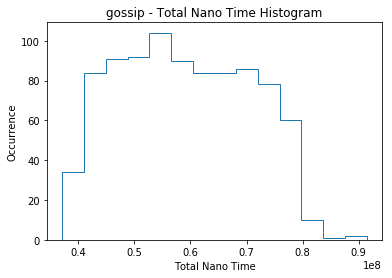

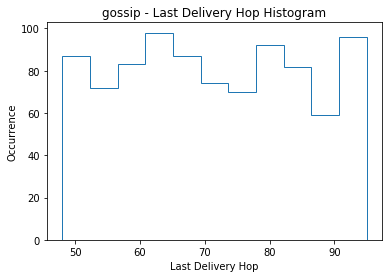

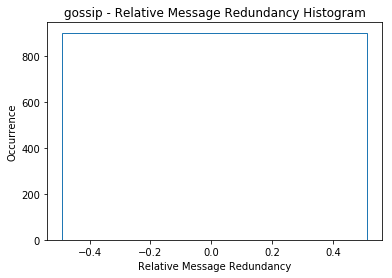

Messages published: 900
Total Nano Times - mean: 59104752.22777778, median: 58528423.5, std: 11446120.655081082
Last Delivery Hop - mean: 71.28777777777778, median: 71.0, std: 13.66115602541078
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


In [7]:
computeMetrics('gossip')